In [1]:
import numpy as np
import pandas as pd

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns_c

[(0.09803921568627451, 0.19607843137254902, 0.3176470588235294),
 (1.0, 0.35294117647058826, 0.21176470588235294),
 (0.4117647058823529, 0.4117647058823529, 0.4117647058823529),
 (0.4588235294117647, 0.5372549019607843, 0.6352941176470588),
 (1.0, 0.35294117647058826, 0.21176470588235294),
 (0.8588235294117647, 0.4, 0.40784313725490196)]

In [4]:
df = pd.read_csv('data/daily_gold_rate.csv')

In [5]:
df.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1/1/1985,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1/2/1985,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1/3/1985,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1/4/1985,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1/7/1985,298.25,392.55,261.17,3741.23,1091.58,835.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10114 non-null  object 
 1   USD     10114 non-null  float64
 2   EUR     10114 non-null  float64
 3   GBP     10114 non-null  float64
 4   INR     10114 non-null  float64
 5   AED     10114 non-null  float64
 6   CNY     10110 non-null  float64
dtypes: float64(6), object(1)
memory usage: 553.2+ KB


In [7]:
df = df.assign(
    Date = lambda x: pd.to_datetime(x['Date']), 
    date = lambda x: x['Date'].dt.date,
    year = lambda x: x['Date'].dt.year,
    month = lambda x: x['Date'].dt.month,
    day = lambda x: x['Date'].dt.day,
    dayofyear = lambda x: x['Date'].dt.dayofyear,
    hour = lambda x: x['Date'].dt.hour,
)

df.head()

,Date,USD,EUR,GBP,INR,AED,CNY,date,year,month,day,dayofyear,hour
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN,1985-01-01,1985,1,1,1,0
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN,1985-01-02,1985,1,2,2,0
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN,1985-01-03,1985,1,3,3,0
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN,1985-01-04,1985,1,4,4,0
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8,1985-01-07,1985,1,7,7,0


In [8]:
print(df.isnull().sum())

Date         0
USD          0
EUR          0
GBP          0
INR          0
AED          0
CNY          4
date         0
year         0
month        0
day          0
dayofyear    0
hour         0
dtype: int64


In [9]:
df.dropna(inplace=True)


In [10]:
df.isnull().sum()

Date         0
USD          0
EUR          0
GBP          0
INR          0
AED          0
CNY          0
date         0
year         0
month        0
day          0
dayofyear    0
hour         0
dtype: int64

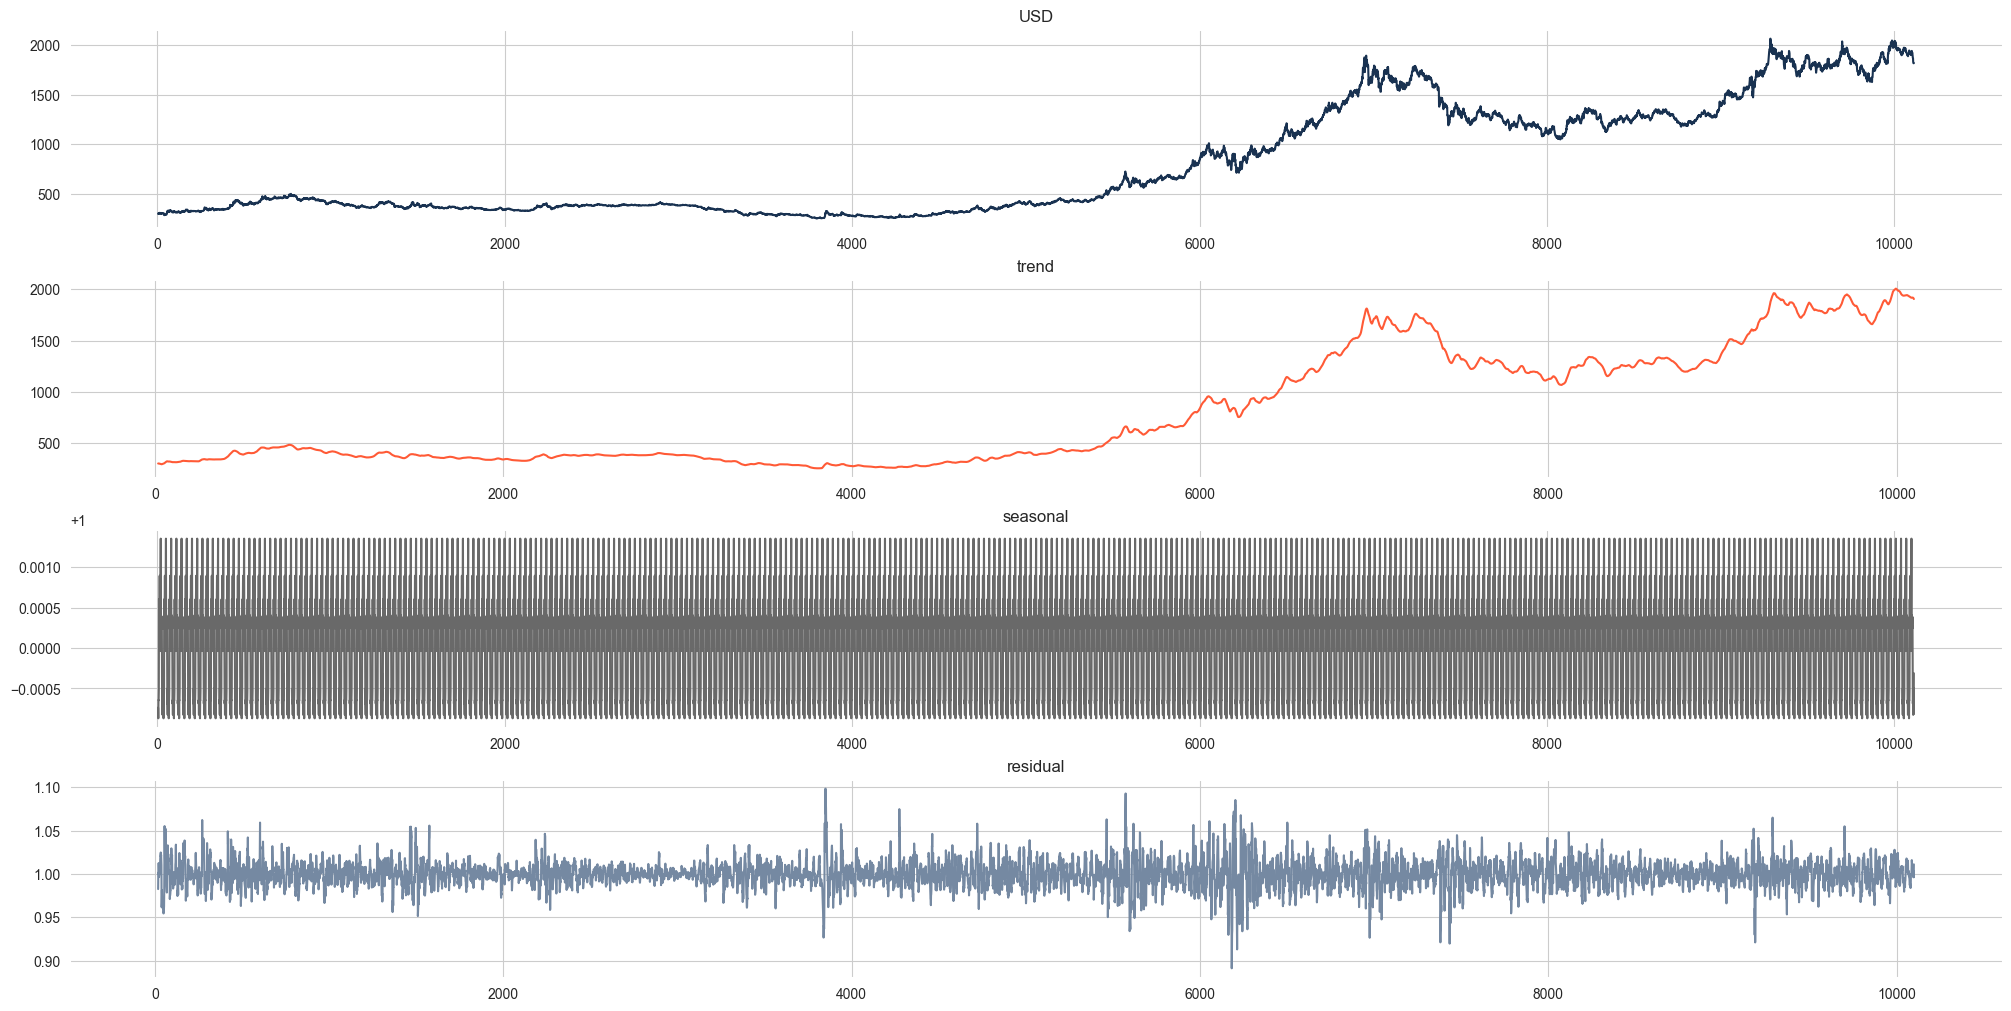

In [11]:
decomposition = seasonal_decompose(x=df['USD'], 
                                   model='multiplicative',
                                   period=30)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='USD')
decomposition.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

In [12]:
from statsmodels.tsa.stattools import adfuller,kpss

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: 0.090963
p-value: 0.965439
----------------------------------------
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 20.597492
p-value: 0.010000
----------------------------------------


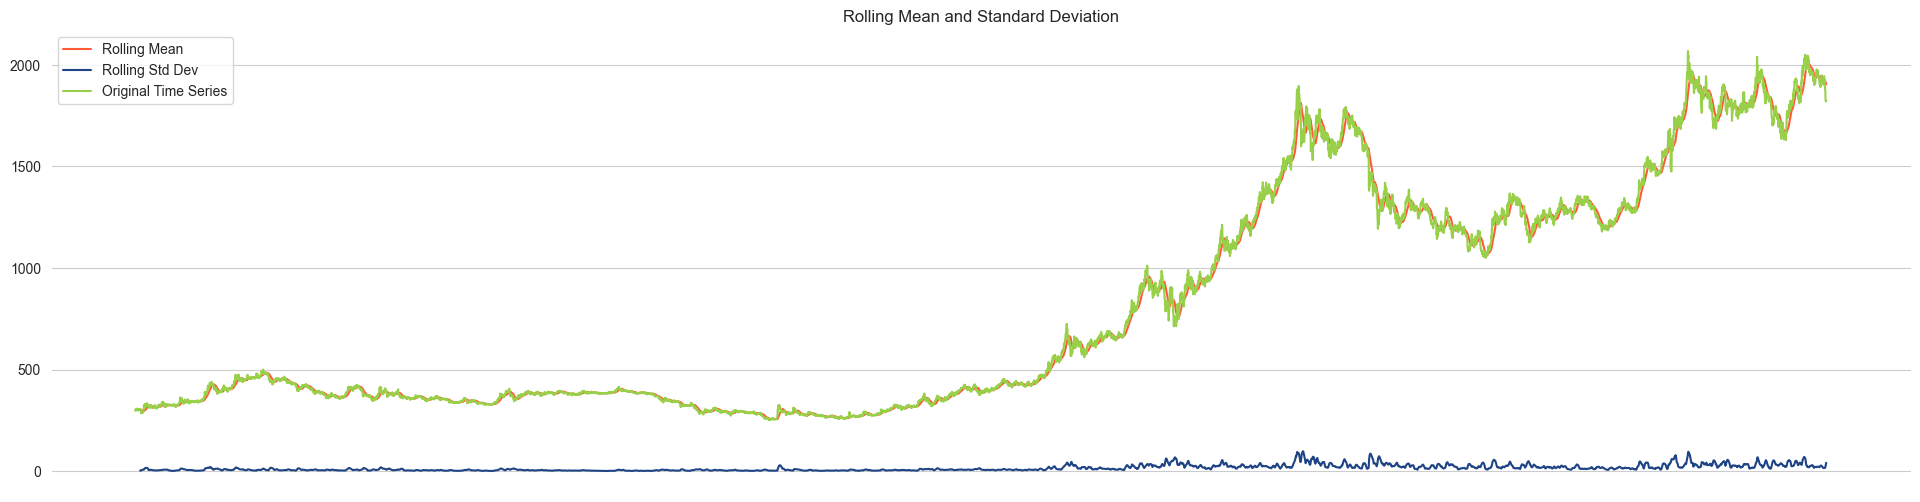

In [13]:
def stationarity_test(USD):
    
    # Calculate rolling mean and rolling standard deviation
    rolling_mean = USD.rolling(30).mean()
    rolling_std_dev = USD.rolling(30).std()
    
    # Plot the statistics
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='#FF5A36', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='#1E4485', label = 'Rolling Std Dev')
    plt.plot(USD, color='#99D04A',label='Original Time Series')
    plt.xticks([])
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    # ADF test
    print("ADF Test:")
    adf_test = adfuller(USD,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('----'*10)
    
    # KPSS test
    print("KPSS Test:")
    kpss_test = kpss(USD, regression='c', nlags="legacy", store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('----'*10)
    
stationarity_test(df['USD'])

In [14]:
df['USD_Detrend'] = (df['USD'] - df['USD'].shift(30))

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -11.646714
p-value: 0.000000
----------------------------------------
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.292962
p-value: 0.100000
----------------------------------------


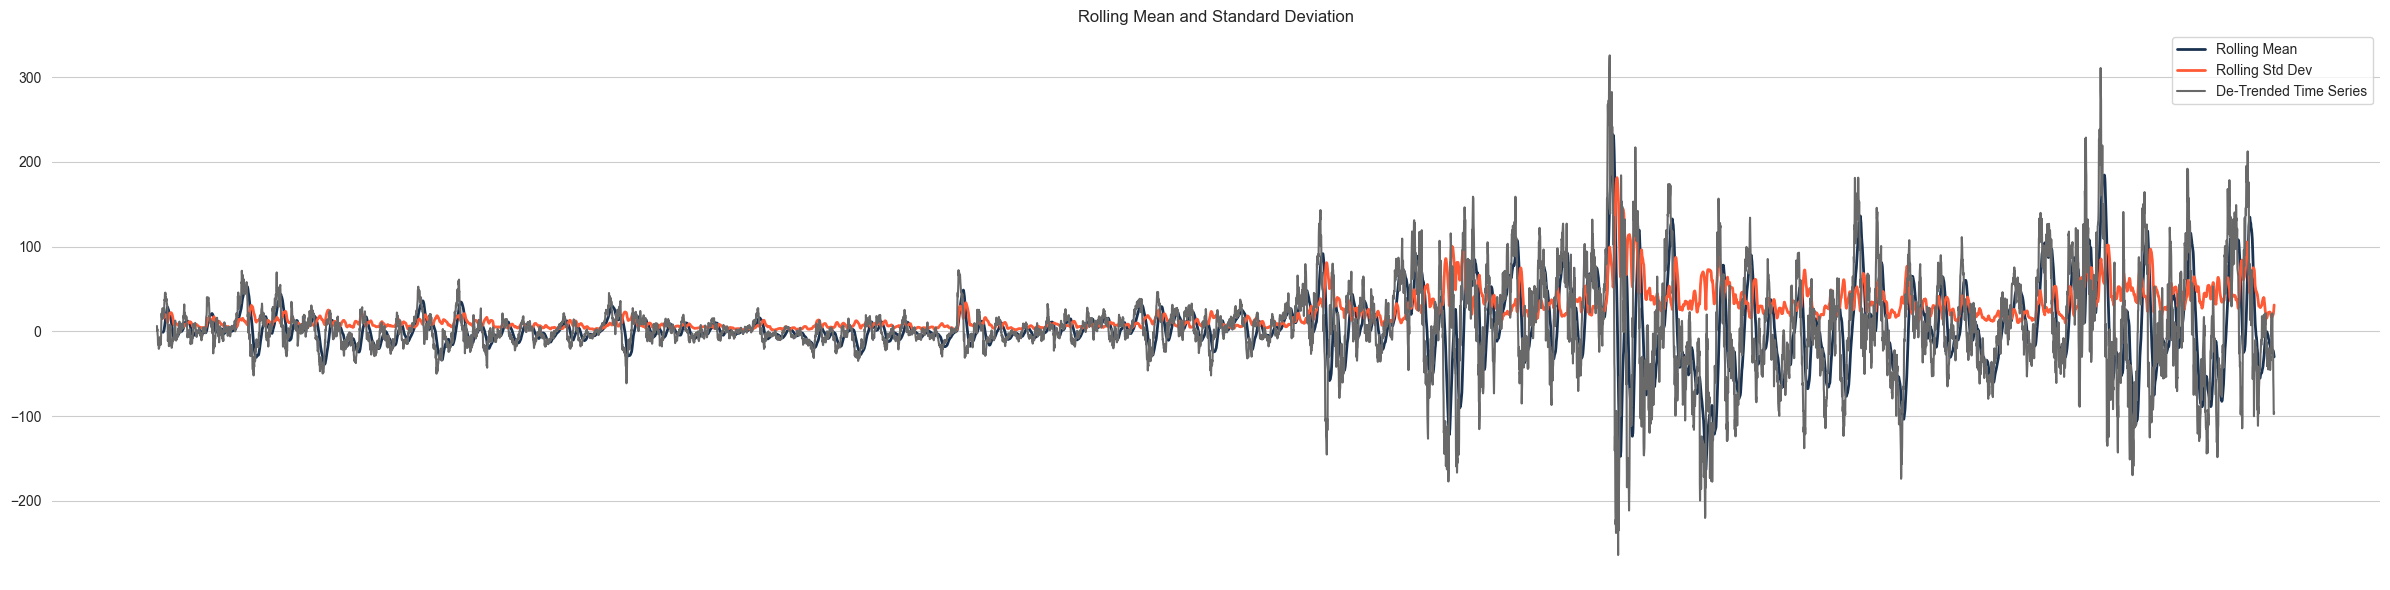

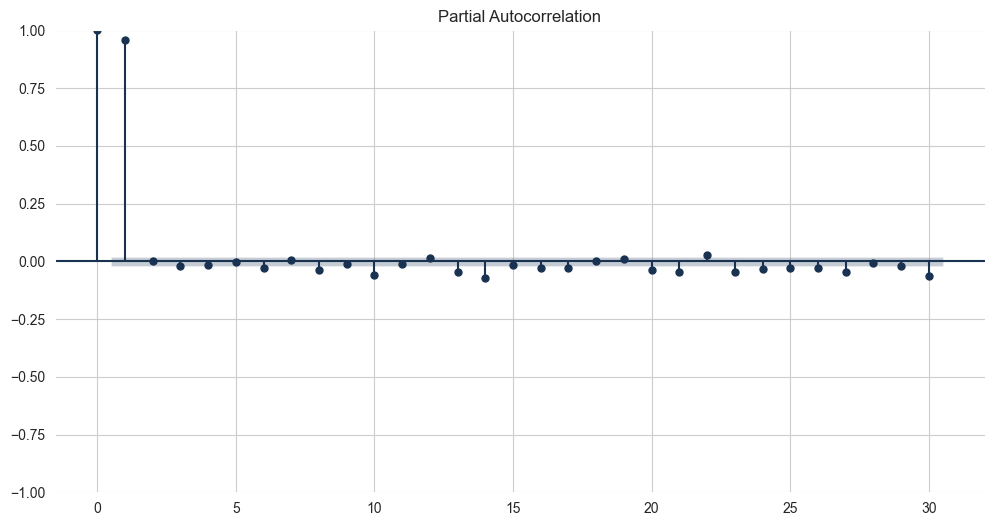

In [16]:
def stationarity_test(USD):
    
    # Calculate rolling mean and rolling standard deviation
    rolling_mean = USD.rolling(30).mean()
    rolling_std_dev = USD.rolling(30).std()
  
    # Plot the statistics
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, label='Rolling Mean',linewidth=2.0)
    plt.plot(rolling_std_dev, label = 'Rolling Std Dev',linewidth=2.0)
    plt.plot(USD,label='De-Trended Time Series')
    plt.xticks([])
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.tight_layout()
    
    # ADF test
    print("ADF Test:")
    adf_test = adfuller(USD,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('----'*10)
    
    # KPSS test
    print("KPSS Test:")
    kpss_test = kpss(USD, regression='c', nlags='legacy', store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('----'*10)
    
stationarity_test(df['USD_Detrend'].dropna())

# Partial Autocorrelation Plot
pacf = plot_pacf(df['USD_Detrend'].dropna(), lags=30)

In [ ]:
df

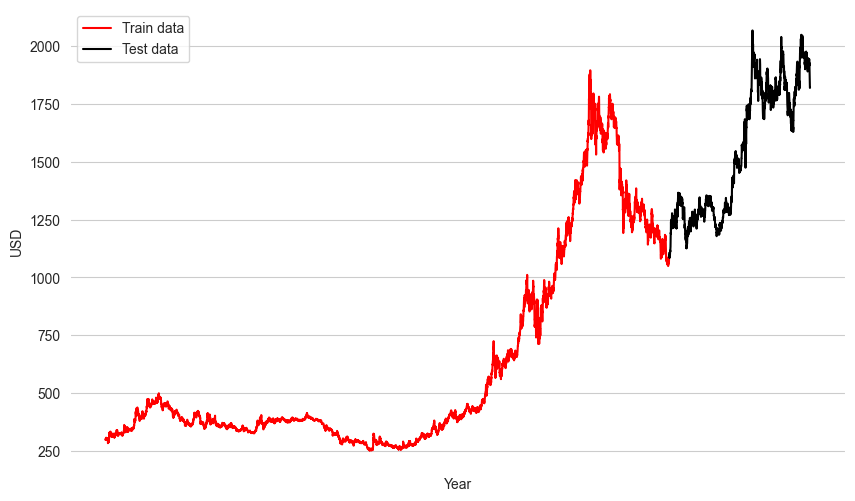

In [17]:
df_arima = df['USD']
train_test_split_ratio = int(len(df_arima)*0.8)
train_data, test_data = df_arima[:train_test_split_ratio], df_arima[train_test_split_ratio:]

# Plotting the train and test set
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('USD')
plt.xticks([])
plt.plot(train_data, 'red', label='Train data')
plt.plot(test_data, 'black', label='Test data')
plt.legend();

In [18]:
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing

In [19]:
from math import sqrt

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
from itertools import permutations

Simple Exponential Smoothing RMS :- 536.143 & Smoothing Level :- 1.0


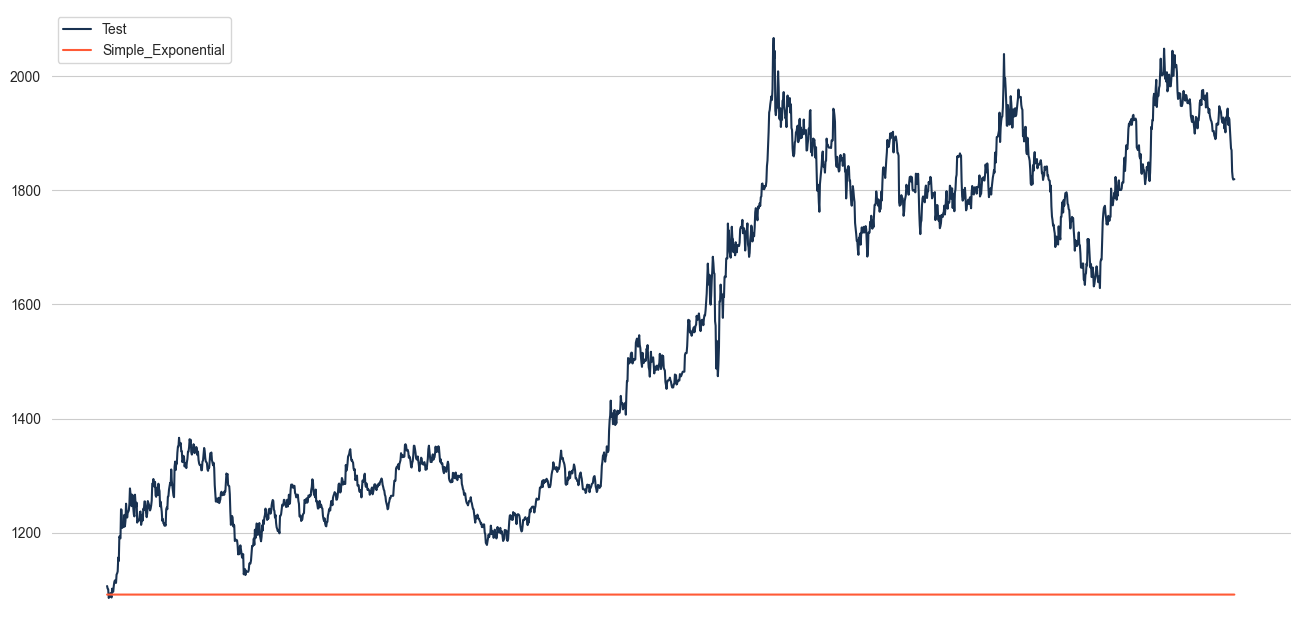

In [36]:
pred_values = test_data.copy()
pred_values = pd.DataFrame(pred_values)

simple_exponential_df = pd.DataFrame(columns = ['RMS','Smoothing Level'])

from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 1)
for i in list(perm):
    fit_sim_exp = SimpleExpSmoothing(np.asarray(train_data)).fit(smoothing_level = i[0])
    pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

    rms = round(sqrt(mean_squared_error(test_data.values, pred_values.Simple_Exponential)),3)
    simple_exponential_df = pd.concat([simple_exponential_df, pd.DataFrame({'RMS' : [rms] , 'Smoothing Level' : [i[0]]})], ignore_index=True)

opt_values = simple_exponential_df.loc[simple_exponential_df['RMS'] == min(simple_exponential_df['RMS']),['Smoothing Level']].values


# Use optimised values from the lists
fit_sim_exp = SimpleExpSmoothing(np.asarray(train_data)).fit(smoothing_level = opt_values[0][0])
pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

plt.figure(figsize=(16,8))
# plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Simple_Exponential'], label='Simple_Exponential')
plt.xticks([])
plt.legend(loc='best')

rms_sim_exp = sqrt(mean_squared_error(test_data.values, pred_values.Simple_Exponential))
print("Simple Exponential Smoothing RMS :- " + str(round(rms_sim_exp,3)) + " & Smoothing Level :- "+str(round(opt_values[0][0],3)))

plt.savefig("visualisations/Stock_Simple_Exponential.png",dpi=300)

Simple Exponential Smoothing RMS :- 536.143 & Smoothing Level :- 1.0


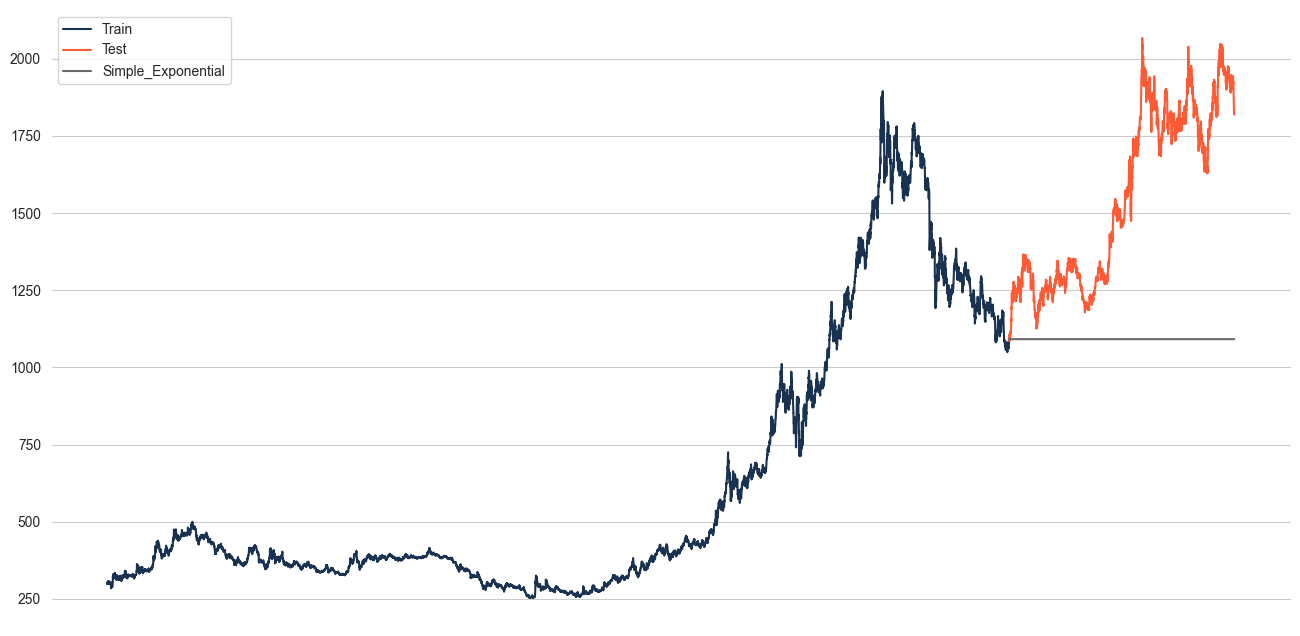

In [23]:
pred_values = test_data.copy()
pred_values = pd.DataFrame(pred_values)

simple_exponential_df = pd.DataFrame(columns = ['RMS','Smoothing Level'])

from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 1)
for i in list(perm):
    fit_sim_exp = SimpleExpSmoothing(np.asarray(train_data)).fit(smoothing_level = i[0])
    pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

    rms = round(sqrt(mean_squared_error(test_data.values, pred_values.Simple_Exponential)),3)
    simple_exponential_df = pd.concat([simple_exponential_df, pd.DataFrame({'RMS' : [rms] , 'Smoothing Level' : [i[0]]})], ignore_index=True)

opt_values = simple_exponential_df.loc[simple_exponential_df['RMS'] == min(simple_exponential_df['RMS']),['Smoothing Level']].values


# Use optimised values from the lists
fit_sim_exp = SimpleExpSmoothing(np.asarray(train_data)).fit(smoothing_level = opt_values[0][0])
pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

plt.figure(figsize=(16,8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Simple_Exponential'], label='Simple_Exponential')
plt.xticks([])
plt.legend(loc='best')

rms_sim_exp = sqrt(mean_squared_error(test_data.values, pred_values.Simple_Exponential))
print("Simple Exponential Smoothing RMS :- " + str(round(rms_sim_exp,3)) + " & Smoothing Level :- "+str(round(opt_values[0][0],3)))

plt.savefig("visualisations/Stock_Simple_Exponential.png",dpi=300)

Holt’s Exponential Smoothing RMS :- 122.64 & Smoothing Level :- 0.7 & Smoothing Slope :- 0.05


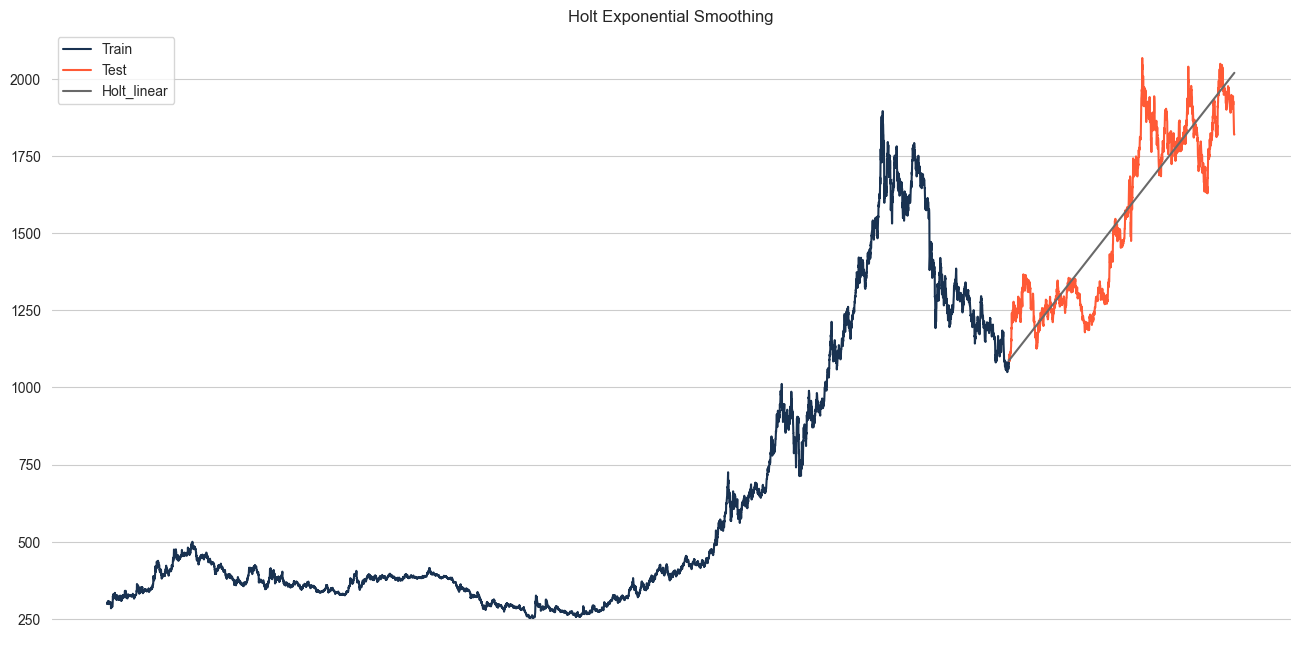

In [24]:
holt_linear_df = pd.DataFrame(columns = ['RMS','Smoothing Level','Smoothing Slope'])

perm = permutations(list(np.linspace(0.05,1,num=20)), 2)
for i in list(perm):
    fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level = i[0],smoothing_slope=i[1])
    pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

    rms = round(sqrt(mean_squared_error(test_data.values, pred_values.Holt_linear)),3)
    #holt_linear_df = holt_linear_df.append(other = {'RMS' : rms , 'Smoothing Level' : i[0], 'Smoothing Slope':i[1]} , ignore_index=True)
    holt_linear_df = pd.concat([holt_linear_df, pd.DataFrame({'RMS' : [rms] , 'Smoothing Level' : [i[0]], 'Smoothing Slope':[i[1]]})], ignore_index=True)

opt_values = holt_linear_df.loc[holt_linear_df['RMS'] == min(holt_linear_df['RMS']),['Smoothing Level','Smoothing Slope']].values


# Using optimised values from the lists.
fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level = opt_values[0][0],smoothing_slope=opt_values[0][1])
pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

plt.figure(figsize=(16,8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Holt_linear'], label='Holt_linear')
plt.xticks([])
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.savefig("visualisations/Stock_Holt_winters.png",dpi=300)

rms_holt_exp = sqrt(mean_squared_error(test_data.values, pred_values.Holt_linear))
print("Holt’s Exponential Smoothing RMS :- " + str(round(rms_holt_exp,3)) + " & Smoothing Level :- "+str(round(opt_values[0][0],3)) + " & Smoothing Slope :- "+str(round(opt_values[0][1],3)))


In [26]:
from statsmodels.tsa.holtwinters import Holt


Holt’s Exponential Smoothing RMS :- 122.64 & Smoothing Level :- 0.7 & Smoothing Slope :- 0.05


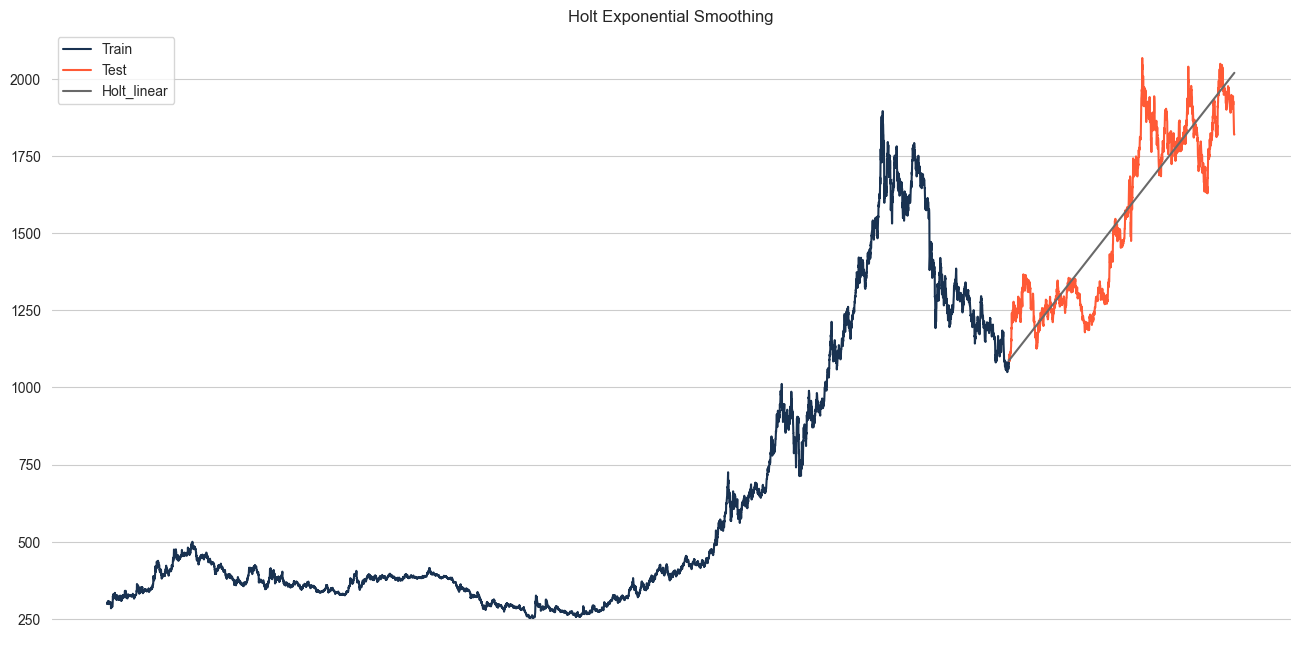

In [27]:
pred_values = pd.DataFrame(test_data.copy())

holt_linear_df = pd.DataFrame(columns=['RMS', 'Smoothing Level', 'Smoothing Slope'])

perm = permutations(list(np.linspace(0.05, 1, num=20)), 2)

for i in list(perm):
    fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level=i[0], smoothing_slope=i[1])
    pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

    rms = round(sqrt(mean_squared_error(test_data.values, pred_values['Holt_linear'])), 3)
    holt_linear_df = pd.concat([holt_linear_df, pd.DataFrame({'RMS': [rms], 'Smoothing Level': [i[0]], 'Smoothing Slope': [i[1]]})], ignore_index=True)

opt_values = holt_linear_df.loc[holt_linear_df['RMS'] == min(holt_linear_df['RMS']), ['Smoothing Level', 'Smoothing Slope']].values

# Using optimized values from the lists.
fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level=opt_values[0][0], smoothing_slope=opt_values[0][1])
pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

plt.figure(figsize=(16, 8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Holt_linear'], label='Holt_linear')
plt.xticks([])
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.savefig("visualisations/Stock_Holt_winters.png", dpi=300)

rms_holt_exp = sqrt(mean_squared_error(test_data.values, pred_values['Holt_linear']))
print("Holt’s Exponential Smoothing RMS :- " + str(round(rms_holt_exp, 3)) + " & Smoothing Level :- " + str(round(opt_values[0][0], 3)) + " & Smoothing Slope :- " + str(round(opt_values[0][1], 3)))

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
!pip install pmdarima

  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 614.7/614.7 kB 7.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------------- -- 2.6/2.8 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 12.4 MB/s eta 0:00:00
Using cached urllib3-2.2.2-py3-none-any.whl (121 kB)


In [33]:
from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=57558.442, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57561.193, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57562.968, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57562.959, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57560.270, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=57563.079, Time=2.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=57563.357, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=57561.563, Time=0.75 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=57561.553, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=57556.086, Time=4.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=57533.534, Time=4.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=57564.718, Time=0.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=57539.069, Time=6.79 sec
 ARIMA(2,1,4)(0,0,0)[0] i

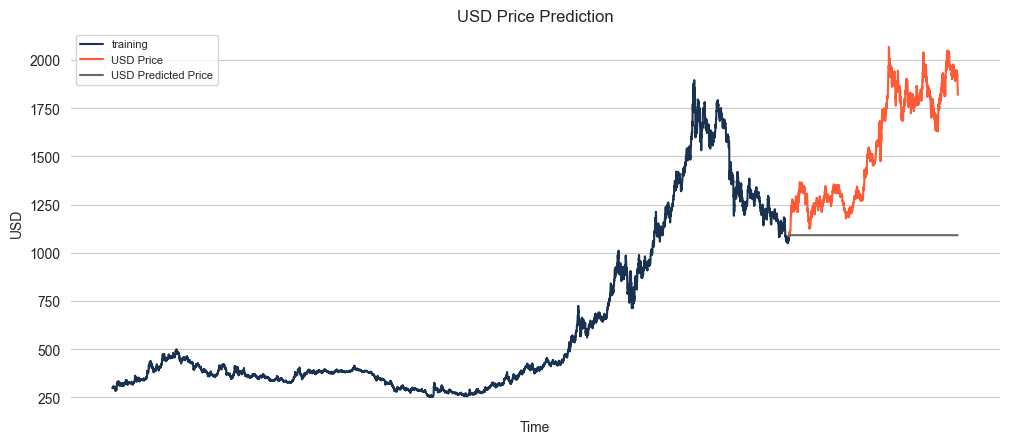

In [35]:
arima_model = auto_arima(train_data,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

# Fit the final model with the order
fitted_model = arima_model.fit(train_data) 
print(fitted_model.summary())

# Forecasting values
forecast_values = fitted_model.predict(len(test_data), alpha=0.05) 
# fcv_series = pd.Series(forecast_values[0], index=test_data.index)
fcv_series = forecast_values

# Plot the predicted stock price and original price
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='USD Price')
plt.plot(fcv_series,label='USD Predicted Price')
plt.title('USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('USD')
plt.xticks([])
plt.legend(loc='upper left', fontsize=8)
#plt.show()

# Evaluate the model by calculating RMSE
rms_auto_arima = sqrt(mean_squared_error(test_data.values, fcv_series))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

plt.savefig("visualisations/Stock_ARIMA.png",dpi=300)